In [2]:
##We load the packages used at the work
##We are going to use as rule pd for Pandas
##If you are going to use Matplotlib, Numpy or
##other, you should search how to name them 
## as rule.
##For keep the order you can use prettier
## in vscode

##Pandas is similar to tidyverse
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
##The next package is used to format tables
##In the next lines you can watch how to use it
from tabulate import tabulate



##La tabla que vamos a emplear es esta, las demás han
##sido eliminadas
file="SouthGermanCredit.asc"
data=pd.read_csv(file," ")

##We are going to change the name of the variables 
##because in German is difficult to us work.
names={'laufkont':'Status',
        'laufzeit':'Duracion',
        'moral':'Historial_Crediticio',
        'verw':'Proposito',
        'hoehe':'Monto',
        'sparkont':'Ahorros',
        'beszeit':'Tiempo_trabajando',
        'rate':'Porcentaje_salario',
        'famges':'Estado_civil_sexo',
        'buerge':'Otros_deudores',
        'wohnzeit':'Residencia',
        'verm':'Propiedad_valiosa',
        'alter':'Edad',
        'weitkred':'Otras_deudas',
        'wohn':'Residencia',
        'bishkred':'Creditos_banco',
        'beruf':'Empleo',
        'pers':'Personas_dependientes',
        'telef':'Telefono',
        'gastarb':'Extranjero',
        'kredit':'Default',}


data.rename(columns=names,inplace=True)
print(data.head(5))
#print(tabulate(data.head(5),headers='keys',tablefmt='latex_longtable'))


   Status  Duracion  Historial_Crediticio  Proposito  Monto  Ahorros  \
0       1        18                     4          2   1049        1   
1       1         9                     4          0   2799        1   
2       2        12                     2          9    841        2   
3       1        12                     4          0   2122        1   
4       1        12                     4          0   2171        1   

   Tiempo_trabajando  Porcentaje_salario  Estado_civil_sexo  Otros_deudores  \
0                  2                   4                  2               1   
1                  3                   2                  3               1   
2                  4                   2                  2               1   
3                  3                   3                  3               1   
4                  3                   4                  3               1   

   ...  Propiedad_valiosa  Edad  Otras_deudas  Residencia  Creditos_banco  \
0  ...         

c:\Users\sabat\AppData\Local\Programs\Python\Python310\lib\site-packages\IPython\core\interactiveshell.py:3397: FutureWarning: In a future version of pandas all arguments of read_csv except for the argument 'filepath_or_buffer' will be keyword-only.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [ ]:
##It's contructed a table of min and max of all to know if 
##the data doesn't have mistakes
data_1=data.agg(['min','max'])
print(tabulate(data_1.transpose(),headers='keys',tablefmt='latex_longtable'))

In [ ]:
##We are going to construct the tables
##We are going to do a resume of five numbers
##Duracion, Monto, Edad
##First we select this three columns
##This new variable is the data.frame with,
##what we want
data_2=data[['Duracion','Edad','Monto','Tiempo_trabajando']]

summary_2=data_2.describe().transpose()
summary_2=summary_2.loc[:,summary_2.columns!='count']



print(tabulate(summary_2,headers='keys',tablefmt='latex_longtable'))

In [9]:
##A table count historial and default
historial_default=pd.crosstab(index=data['Default'],columns=data['Historial_Crediticio'],margins=True)
print(tabulate(historial_default,headers='keys',tablefmt='latex_longtable'))

\begin{longtable}{lrrrrrr}
\hline
 Default   &   0 &   1 &   2 &   3 &   4 &   All \\
\hline
\endhead
 0         &  25 &  28 & 169 &  28 &  50 &   300 \\
 1         &  15 &  21 & 361 &  60 & 243 &   700 \\
 All       &  40 &  49 & 530 &  88 & 293 &  1000 \\
\hline
\end{longtable}


In [ ]:
##A table count savings and default
savings_default=pd.crosstab(index=data['Default'],columns=data['Ahorros'])
print(tabulate(savings_default,headers='keys',tablefmt='latex_longtable'))

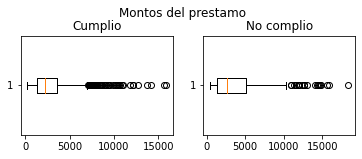

In [129]:
datosG1 = data.loc[:, ["Monto", "Default"]]
datosG1[datosG1["Default"]==1]

plt.subplot(2, 2, 1)
plt.boxplot(datosG1[datosG1["Default"]==1].Monto,vert=False)
plt.title("Cumplio")

plt.subplot(2, 2, 2)
plt.boxplot(datosG1[datosG1["Default"]==0].Monto,vert=False)
plt.title("No complio")

plt.suptitle("Montos del prestamo")
plt.show()

{'whiskers': [<matplotlib.lines.Line2D at 0x1315d9bfa30>,
 'caps': [<matplotlib.lines.Line2D at 0x1315d9bffd0>,
 'boxes': [<matplotlib.patches.PathPatch at 0x1315d9bf670>,
 'medians': [<matplotlib.lines.Line2D at 0x1315d9d85b0>,
 'fliers': [<matplotlib.lines.Line2D at 0x1315d9d8880>,
 'means': []}

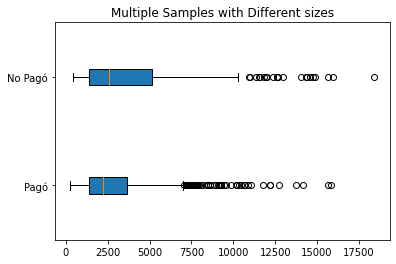

In [131]:
datosG2 = [datosG1[datosG1["Default"]==1].Monto, datosG1[datosG1["Default"]==0].Monto]
fig7, ax7 = plt.subplots()
ax7.set_title('Multiple Samples with Different sizes')
ax7.boxplot(datosG2,vert=False, labels=["Pagó", "No Pagó"], patch_artist=True)

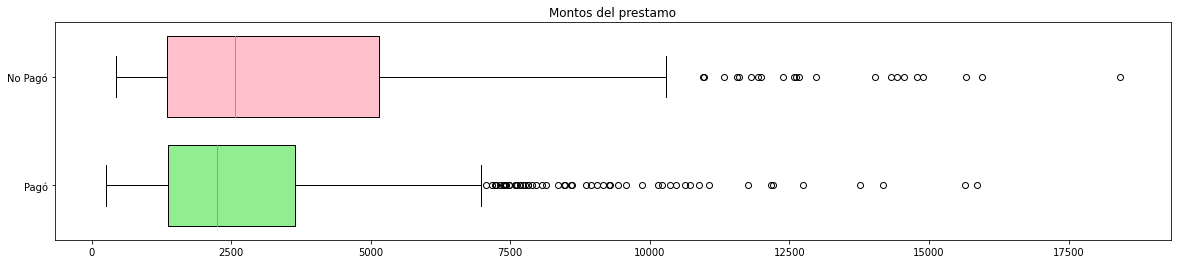

In [142]:
fig, (ax1) = plt.subplots(nrows=1, ncols=1, figsize=(20, 4))

# rectangular box plot
bplot1 = ax1.boxplot(datosG2,
                     vert=False,  # vertical box alignment
                     patch_artist=True,  # fill with color
                     labels=["Pagó", "No Pagó"],
                     widths=(0.75, 0.75))  # will be used to label x-ticks
ax1.set_title("Montos del prestamo")


# fill with colors
for patch, color in zip(bplot1['boxes'], [ 'lightgreen','pink']):
        patch.set_facecolor(color)


plt.show()

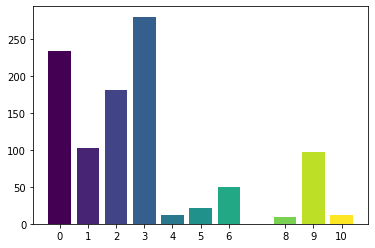

In [58]:
#Para hacer un grafico donde los grafico donde esten a la par, 0 y 1
x= data.loc[:, ["Proposito" ]]
y=np.unique(x)
my_cmap = plt.get_cmap("viridis")
rescale = lambda y: (y - np.min(y)) / (np.max(y) - np.min(y))

plt.bar(*np.unique(x, return_counts=True),  color=my_cmap(rescale(y)))
plt.xticks(y)
plt.show()


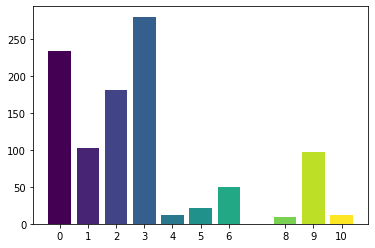

In [71]:
x= data.loc[:, ["Proposito" ]]
y=np.unique(x)
my_cmap = plt.get_cmap("viridis")
rescale = lambda y: (y - np.min(y)) / (np.max(y) - np.min(y))

plt.bar(*np.unique(x, return_counts=True),  color=my_cmap(rescale(y)))
plt.xticks(y)
plt.show()

In [10]:
#Hacer que para cada uno de los labels este los defalu, me gusta más

labels = ["Extranjero", "Nacional"]

datosG1=pd.crosstab(index=data['Default'],columns=data['Extranjero'],margins=True)

eje1=np.unique(datosG1[datosG1["Default"]==1], return_counts=True)
eje2=np.unique(datosG1[datosG1["Default"]==0], return_counts=True)
x = np.arange(len(labels))  # the label locations
width = 0.5  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(eje1[0]- width/2 ,eje1[1], width, label='Pago')
rects2 = ax.bar(eje2[0]+ width/2, eje2[1], width, label='No pago')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Scores')
ax.set_title('Scores by group and gender')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')


autolabel(rects1)
autolabel(rects2)


fig.tight_layout()

plt.show()

KeyError: 'Default'

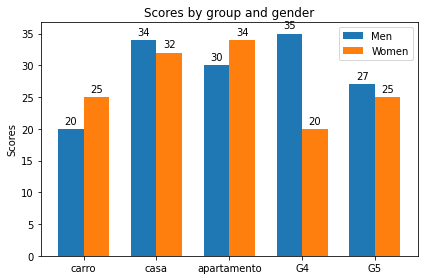

In [49]:
#funcion para los numeros arriba
labels = ['carro', 'casa', 'apartamento', 'G4', 'G5']
men_means = [20, 34, 30, 35, 27]
women_means = [25, 32, 34, 20, 25]

x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, men_means, width, label='Men')
rects2 = ax.bar(x + width/2, women_means, width, label='Women')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Scores')
ax.set_title('Scores by group and gender')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()


def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')


autolabel(rects1)
autolabel(rects2)

fig.tight_layout()

plt.show()

Text(0.5, 1.0, 'bars with legend')

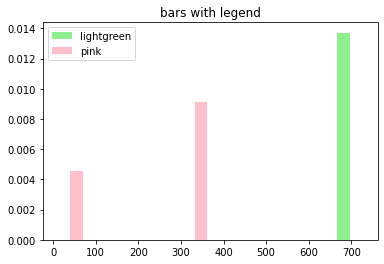

In [79]:
fig, ax0 = plt.subplots()
eje3=[eje1[1], eje2[1]]
colors = ['lightgreen','pink']
ax0.hist(eje3, density=True, histtype='bar', color=colors, label=colors)
ax0.legend(prop={'size': 10})
ax0.set_title('bars with legend')

In [7]:
eje1


(array([1, 2], dtype=int64), array([733, 667], dtype=int64))